# Machine Learning
[Scikit-Learn](https://scikit-learn.org/stable/index.html) is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
### p.331

## Categories of Machine Learning

- ### 1.Supervised learning
    - 1.1 Classification
    - 1.2 Regression

- ### 2.Unsupervised learning
    - 2.1 Clustering
    - 2.2 Dimensionality reduction

In [2]:
# Data Representation in Scikit-Learn
import seaborn as sns
%matplotlib inline

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


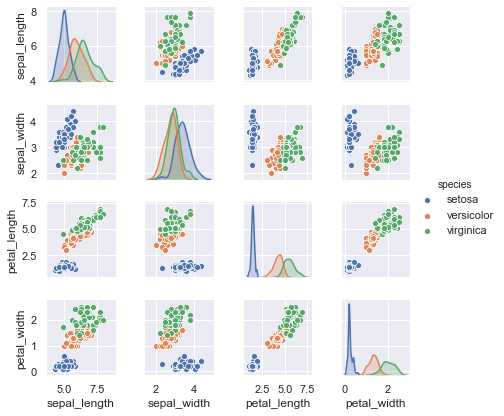

In [5]:
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [6]:
X_iris = iris.drop('species', axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API
### Consistency

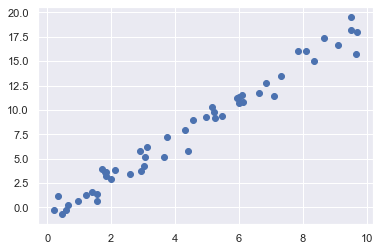

In [10]:
# Supervised learning example : Simple linear Regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)

y = 2 * x- 1 + rng.randn(50)
plt.scatter(x, y);

## 1.Choose a class of model

In [11]:
from sklearn.linear_model import LinearRegression

## 2.Choose model hyperparameters

In [12]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3.Arrange data into a features matrix and target vector

In [13]:
X = x[:,np.newaxis]
X.shape

(50, 1)

## 4.Fit the model to your data

In [14]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311164

## 5.Predict labels for unknown data

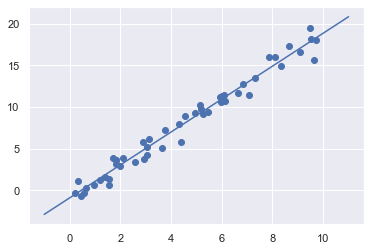

In [17]:
xfit=np.linspace(-1, 11)
Xfit=xfit[:, np.newaxis]
yfit=model.predict(Xfit)

plt.scatter(x,y)
plt.plot(xfit,yfit);

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,  Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
# 1.Choose model class
from sklearn.naive_bayes import GaussianNB
# 2.Instantiate model
model = GaussianNB()
# 3.Fit model to data
model.fit(Xtrain, ytrain)
# 4.Predict on new data
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)*100

97.36842105263158

## Unsupervised learning

In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

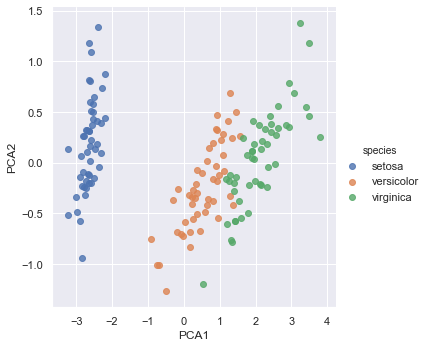

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='species', data=iris, fit_reg=False)

In [28]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

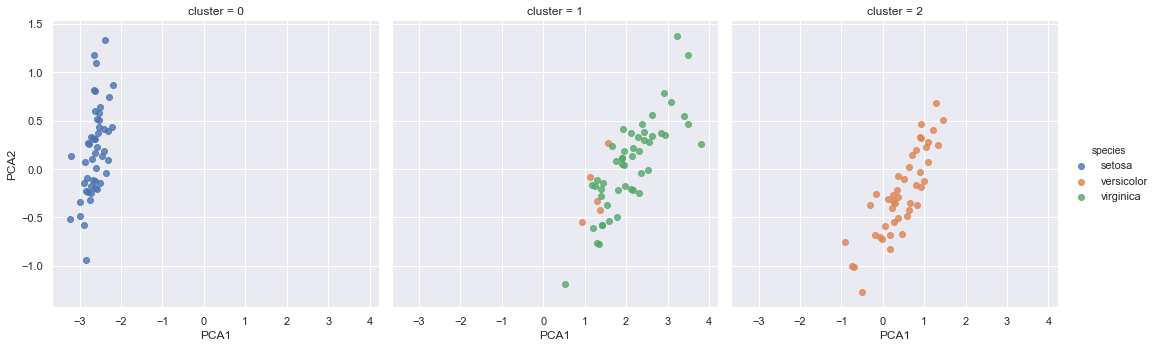

In [30]:
iris['cluster']= y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg =False)

## Application: Exploring Handwritten Digits

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

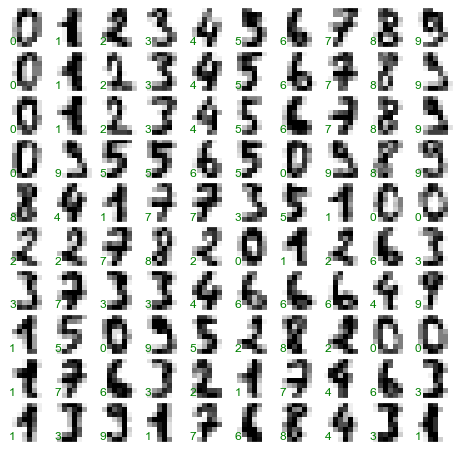

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [34]:
x = digits.data
x.shape

(1797, 64)

In [36]:
y = digits.target
y.shape

(1797,)

In [37]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

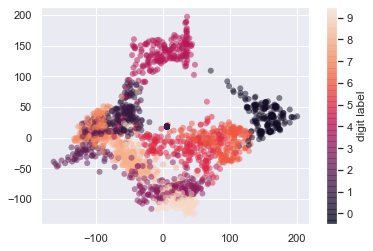

In [43]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(77.10000000000001, 0.5, 'true value')

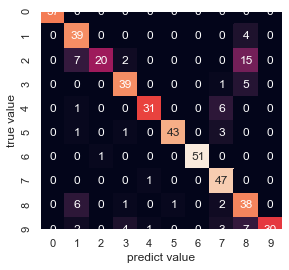

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predict value')
plt.ylabel('true value')

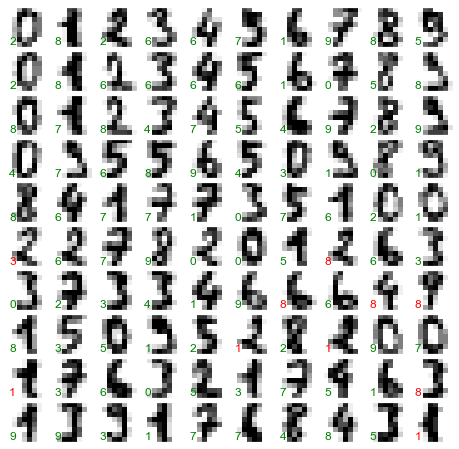

In [52]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green'if (ytest[i]==y_model[i]) else 'red')

## Hyperparameters and Model Validation

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=1)


In [55]:
model.fit(x,y)
y_model = model.predict(x)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### Model validation the right way: Holdout sets(p.360)

In [58]:
from sklearn.model_selection import train_test_split
# split the data eith 50% in each set
X1, X2, y1, y2 = train_test_split(x, y, random_state=0, train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [61]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [68]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, x, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
scores.mean()

0.96

## Selecting the best model(p.363) 

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))